<a href="https://colab.research.google.com/github/Helsonfs/Estudos_data_science_cvirus/blob/main/Estudos_Data_Science_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
mortos = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")
recuperados = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")

In [3]:
confirmados.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631


In [4]:
confirmados.shape

(279, 546)

In [5]:
confirmados['Country/Region']

0             Afghanistan
1                 Albania
2                 Algeria
3                 Andorra
4                  Angola
              ...        
274               Vietnam
275    West Bank and Gaza
276                 Yemen
277                Zambia
278              Zimbabwe
Name: Country/Region, Length: 279, dtype: object

In [6]:
last_date = '7/11/21'

confirmados[last_date]

0      131586
1      132592
2      146064
3       14075
4       39958
        ...  
274     30478
275    315160
276      6948
277    175729
278     67765
Name: 7/11/21, Length: 279, dtype: int64

In [7]:
confirmados['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [8]:
confirmados.sample(20)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21
167,NaN,Lesotho,-29.61000,28.233600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10837,10839,10839,10846,10853,10859,10921,10923,10923,10950,10950,11010,11081,11081,11107,11128,11168,11168,11168,11239,11239,11239,11344,11344,11416,11544,11568,11568,11568,11634,11638,11644,11646,11903,11903,11903,11907,12153,12153,12398
163,NaN,Kyrgyzstan,41.20438,74.766098,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107335,107714,108173,108667,109193,109812,110370,110829,111343,111990,112777,113430,114300,115030,115615,116546,117284,118106,118981,119873,120865,121946,123038,125003,126395,127880,129232,130633,132070,133303,134501,135739,137058,138353,139648,140978,142270,143668,144958,146292
46,Northwest Territories,Canada,64.82550,-124.845700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128,128
120,French Polynesia,France,-17.67970,149.406800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18899,18902,18914,18922,18930,18930,18930,18939,18947,18952,18957,18963,18963,18963,18972,18981,18991,18992,18994,18994,18994,19003,19003,19007,19007,19011,19011,19011,19017,19020,19022,19026,19026,19026,19026,19034,19042,19042,19058,19085
92,NaN,Colombia,4.57090,-74.297300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3593016,3611602,3633481,3665137,3694707,3724705,3753224,3777600,3802052,3829879,3859824,3888614,3917348,3945166,3968405,3997021,4027016,4060013,4092746,4126340,4158716,4187194,4213074,4240982,4269297,4297302,4324230,4350495,4375861,4402582,4426811,4450086,4471622,4471622,4471622,4530610,4548142,4565372,4583442,4601335
75,Jiangxi,China,27.61400,115.722100,2,7,18,18,36,72,109,109,162,240,286,333,391,476,548,600,661,698,740,771,804,844,872,900,913,925,930,933,934,934,934,934,934,934,934,934,...,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937,937
262,Channel Islands,United Kingdom,49.37230,-2.364400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4076,4076,4083,4088,4088,4088,4099,4112,4112,4112,4124,4126,4126,4128,4128,4150,4150,4150,4218,4219,4220,4293,4322,4383,4448,4515,4515,4521,4521,4798,4798,4901,5205,5205,5205,5662,5889,6101,6383,6595
175,NaN,Malawi,-13.25430,34.301500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,34403,34410,34432,34447,34470,34485,34485,34564,34588,34650,34702,34781,34832,34868,34914,34996,35115,35219,35388,35554,35629,35709,35897,36126,36359,36573,36820,36926,37057,37366,37556,37983,38434,38946,39186,39418,39932,40713,41498,42254
228,NaN,Seychelles,-4.67960,55.492000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12466,12466,12466,12466,12973,12973,12973,13630,13630,13630,14123,14123,14123,14123,14123,14620,14620,14620,15116,15116,15116,15579,15579,15579,15579,15857,15857,15857,16304,16304,16304,16679,16679,16679,16679,17005,17005,17005,17005,17234
116,NaN,Ethiopia,9.14500,40.489700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,273024,273175,273398,273678,273892,274028,274187,274346

In [9]:
confirmados.set_index('Province/State').loc['Anhui']

Country/Region      China
Lat               31.8257
Long              117.226
1/22/20                 1
1/23/20                 9
                   ...   
7/12/21              1008
7/13/21              1008
7/14/21              1008
7/15/21              1008
7/16/21              1008
Name: Anhui, Length: 545, dtype: object

In [10]:
confirmados.set_index('Province/State').iloc[1]

Country/Region    Albania
Lat               41.1533
Long              20.1683
1/22/20                 0
1/23/20                 0
                   ...   
7/12/21            132597
7/13/21            132608
7/14/21            132616
7/15/21            132629
7/16/21            132647
Name: nan, Length: 545, dtype: object

In [11]:
# valor palso pois é muito grande, não valos considerar essa análise pois há varios campos vazios (muita disparidade no padrão)

confirmados['Country/Region'].value_counts() 

China             34
Canada            16
United Kingdom    12
France            12
Australia          8
                  ..
Serbia             1
Timor-Leste        1
Kyrgyzstan         1
Tanzania           1
Andorra            1
Name: Country/Region, Length: 195, dtype: int64

In [12]:
confirmados_por_pais = confirmados.groupby('Country/Region').sum()
confirmados_por_pais.head()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,...,80841,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853
Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132384,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647
Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,131283,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103
Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13777,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273
Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,35854,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631


In [13]:
confirmados_por_pais.sample(10)

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,...,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Seychelles,-4.679600,55.492000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,12466,12466,12466,12466,12973,12973,12973,13630,13630,13630,14123,14123,14123,14123,14123,14620,14620,14620,15116,15116,15116,15579,15579,15579,15579,15857,15857,15857,16304,16304,16304,16679,16679,16679,16679,17005,17005,17005,17005,17234
Monaco,43.733300,7.416700,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2508,2511,2514,2516,2520,2524,2525,2526,2532,2539,2545,2547,2548,2548,2549,2554,2557,2562,2570,2570,2571,2575,2576,2577,2580,2586,2587,2587,2589,2595,2599,2603,2611,2622,2622,2624,2640,2648,2655,2662
Ghana,7.946500,-1.023200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,94228,94228,94369,94369,94444,94493,94493,94493,94699,94824,94824,94913,94913,94913,95059,95236,95236,95259,95259,95259,95369,95476,95642,95914,95914,95914,96067,96317,96402,96402,96708,96971,96971,97130,97585,97585,97728,97728,98114,98114
Trinidad and Tobago,10.691800,-61.222500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,26799,27079,27533,27806,28106,28422,28723,28982,29309,29606,29956,30183,30513,30619,30767,30982,31207,31429,31775,32069,32198,32343,32528,32793,33029,33153,33313,33428,33555,33805,33920,34241,34402,34577,34765,34822,35046,35236,35428,35679
Brazil,-14.235000,-51.925300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,16984218,17037129,17122877,17210969,17296118,17374818,17412766,17452612,17533221,17628588,17702630,17801462,17883750,17927928,17966831,18054653,18169881,18243483,18322760,18386894,18420598,18448402,18513305,18557141,18622304,18687469,18742025,18769808,18792511,18855015,18909037,18962762,19020499,19069003,19089940,19106971,19151993,19209729,19262518,19308109
Eswatini,-26.522500,31.465900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18664,18680,18694,18705,18723,18732,18736,18746,18754,18768,18784,18800,18811,18813,18831,18854,18898,18947,18989,19018,19035,19084,19084,19084,19084,19084,19084,19084,19084,19410,19522,19662,19779,19870,19918,20080,20280,20489,20693,20898
Benin,9.307700,2.315800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8082,8082,8109,8109,8109,8109,8109,8109,8140,8140,8140,8140,8140,8140,8140,8170,8170,8170,8170,8170,8170,8170,8199,8199,8199,8199,8199,8199,8199,8199,8227,8227,8227,8227,8227,8227,8227,8244,8244,8244
Cameroon,3.848000,11.502100,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,78929,79904,79904,79904,80090,80090,80090,80090,80090,80328,80328,80328,80328,80328,80328,80487,80487,80487,80487,80487,80487,80487,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,80858,81467
Mozambique,-18.665695,35.529562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,71145,71165,71239,71279,71355,71461,71538,71568,71651,71764,71929,72123,72367,72507,72577,72775,73211,73652,74186,74704,75138,75422,75828,76404,77205,78074,79213,80151,80888,82346,83116,84922,86249,87935,88868,90555,91886,93429,94733,96127


In [14]:
confirmados_por_pais.loc['China'][2:]

1/22/20       548.0
1/23/20       643.0
1/24/20       920.0
1/25/20      1406.0
1/26/20      2075.0
             ...   
7/12/21    104101.0
7/13/21    104126.0
7/14/21    104157.0
7/15/21    104193.0
7/16/21    104224.0
Name: China, Length: 542, dtype: float64

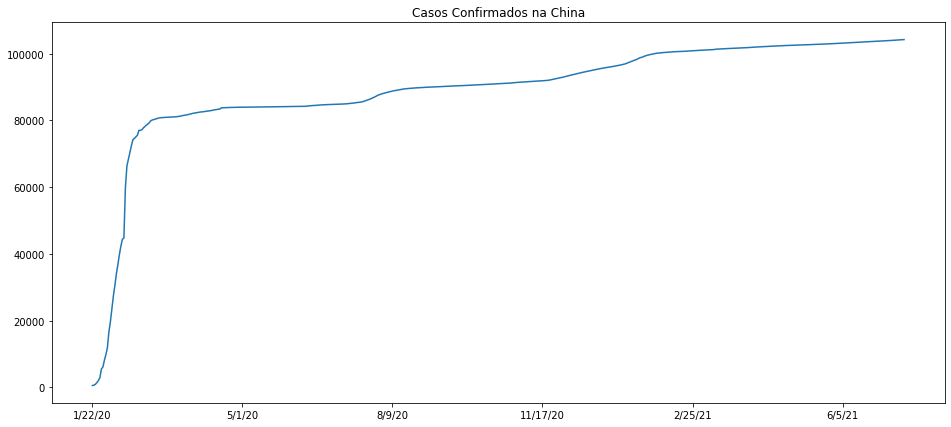

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,7))
confirmados_por_pais.loc['China'][2:].plot()
plt.title('Casos Confirmados na China')
plt.show()

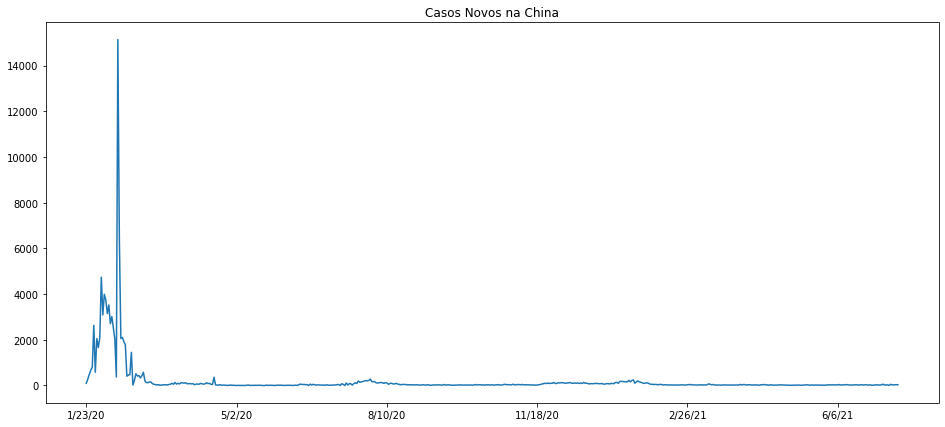

In [16]:
plt.figure(figsize=(16,7))
plt.title('Casos Novos na China')
novos_casos_china = confirmados_por_pais.loc['China'][2:].diff().dropna()
novos_casos_china.plot()

Text(0.5, 1.0, 'Confirmados por país')

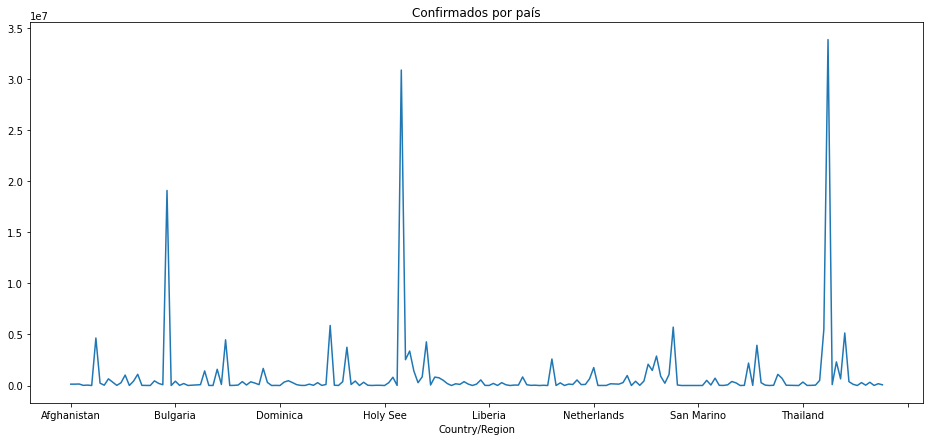

In [17]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].plot()
plt.title('Confirmados por país')

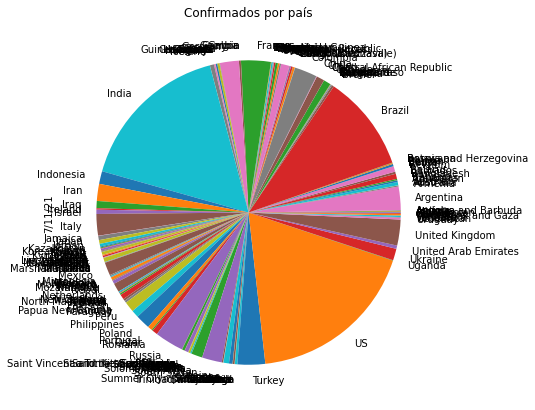

In [18]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].plot(kind = 'pie')
plt.title('Confirmados por país')
plt.show()

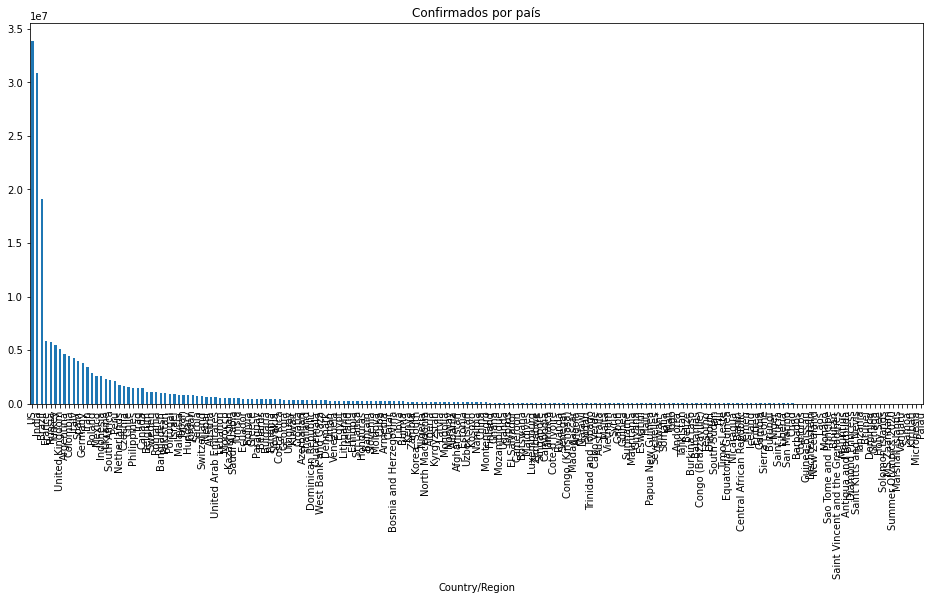

In [19]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].sort_values(ascending = False).plot(kind = 'bar')
plt.title('Confirmados por país')
plt.show()

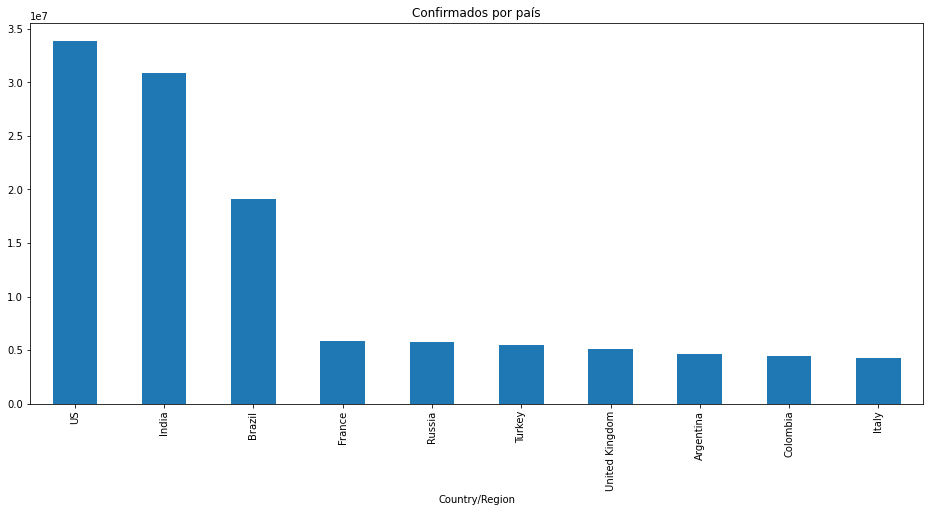

In [20]:
plt.figure(figsize=(16,7))
confirmados_por_pais[last_date].sort_values(ascending = False)[:10].plot(kind = 'bar')
plt.title('Confirmados por país')
plt.show()

In [21]:
display(mortos.head())
display(recuperados.head())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3187,3251,3305,3356,3412,3449,3527,3612,3683,3683,3842,3934,3934,3934,4215,4293,4366,4452,4519,4519,4519,4730,4794,4871,4962,4962,4962,4962,5283,5360,5415,5477,5561,5561,5561,5791,5791,5923,5983,5983
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2452,2452,2452,2452,2453,2453,2453,2453,2454,2454,2454,2454,2454,2454,2454,2455,2455,2455,2455,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456,2456
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3527,3537,3544,3552,3560,3565,3571,3579,3588,3598,3605,3615,3624,3631,3641,3650,3660,3669,3678,3685,3693,3699,3708,3716,3726,3735,3745,3755,3765,3775,3786,3798,3811,3824,3836,3851,3867,3882,3895,3910
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127,127
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,800,803,811,815,819,825,831,836,842,847,851,853,856,859,868,875,878,881,883,887,889,891,894,900,903,906,910,913,915,920,925,925,928,929,935,939,941,946,951,952


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/7/21,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,58998,59569,59871,60280,60598,60939,61410,61706,61820,62397,62698,63426,63875,64401,65071,65565,66102,66799,67183,67483,68288,69205,70016,71012,71924,72700,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586,82586,82586,82586,82586
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,129702,129736,129761,129785,129807,129826,129842,129865,129879,129888,129895,129903,129910,129918,129918,129941,129955,129966,129975,129982,129990,129994,130002,130009,130014,130018,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052,130053,130059,130061,130067
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91413,91651,91894,92132,92384,92620,92852,93094,93355,93586,93831,94093,94336,94571,94822,95084,95331,95599,95878,96108,96335,96572,96815,97089,97380,97701,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010,102594,103192,103809,104397
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13557,13557,13569,13578,13591,13591,13591,13618,13626,13633,13640,13650,13650,13650,13665,13665,13688,13694,13697,13697,13697,13697,13717,13720,13721,13721,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787,13796,13796,13829,13844
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,29329,29368,29553,29960,30101,30207,30282,30359,30775,31003,31105,31569,31589,31676,31782,32003,32322,32340,32605,32696,32791,32819,33079,33242,33271,33375,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357,34500,34584,34620,34724


In [22]:
confirmados.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    131586
Albania        132592
Algeria        146064
Andorra         14075
Angola          39958
Name: 7/11/21, dtype: int64

In [23]:
mortos.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan    5561
Albania        2456
Algeria        3836
Andorra         127
Angola          935
Name: 7/11/21, dtype: int64

In [24]:
recuperados.groupby('Country/Region').sum()[last_date].head()

Country/Region
Afghanistan     81077
Albania        130050
Algeria        101430
Andorra         13770
Angola          34327
Name: 7/11/21, dtype: int64

In [25]:
def latest_por_pais(data):
  return data.groupby('Country/Region').sum().iloc[:,-1]

latest_por_pais(confirmados).head()

Country/Region
Afghanistan    137853
Albania        132647
Algeria        151103
Andorra         14273
Angola          40631
Name: 7/16/21, dtype: int64

In [26]:
def latest_por_pais_por_data(data, date):
  return data.groupby('Country/Region').sum()[date]


In [33]:
informacoes2 = [latest_por_pais_por_data(confirmados, '2/20/20'), latest_por_pais_por_data(mortos, '2/20/20'), latest_por_pais_por_data(recuperados, '2/20/20')]
combinados_2_20_20 = pd.concat(informacoes2, axis=1)
combinados_2_20_20.columns = ['confirmados', 'mortos', 'recuperados']

In [34]:
sum_up = combinados_2_20_20.loc['China']
letality_rate_1 = sum_up['mortos'] / sum_up['confirmados']
letality_rate_2 = sum_up['mortos'] / (sum_up['mortos'] + sum_up['recuperados'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.980939568709458
11.050760418724076


In [35]:
display(sum_up)

confirmados    75077
mortos          2238
recuperados    18014
Name: China, dtype: int64

In [37]:
combinados = pd.concat(informacoes2, axis=1)
combinados.columns = ['confirmados', 'mortos', 'recuperados']
combinados.head()

,confirmados,mortos,recuperados
Country/Region,,,
Afghanistan,0,0,0
Albania,0,0,0
Algeria,0,0,0
Andorra,0,0,0
Angola,0,0,0


In [38]:
sum_up = combinados.sum()
letality_rate_1 = sum_up['mortos'] / sum_up['confirmados']
letality_rate_2 = sum_up['mortos'] / (sum_up['mortos'] + sum_up['recuperados'])
print(letality_rate_1 * 100)
print(letality_rate_2 * 100)

2.9496667191518395
11.00504234591472


In [39]:
letality_rate_1 = combinados['mortos'] / combinados['confirmados'] * 100
letality_rate_2 = combinados['mortos'] / (combinados['mortos'] + combinados['recuperados']) * 100
combinados['letality_rate_1'] = letality_rate_1
combinados['letality_rate_2'] = letality_rate_2
combinados.head()

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
Afghanistan,0,0,0,NaN,NaN
Albania,0,0,0,NaN,NaN
Algeria,0,0,0,NaN,NaN
Andorra,0,0,0,NaN,NaN
Angola,0,0,0,NaN,NaN


In [40]:
combinados.sort_values('letality_rate_1', ascending=False).head()

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
Iran,5,2,0,40.000000,100.000000
Philippines,3,1,1,33.333333,50.000000
France,12,1,4,8.333333,20.000000
Taiwan*,24,1,2,4.166667,33.333333
China,75077,2238,18014,2.980940,11.050760


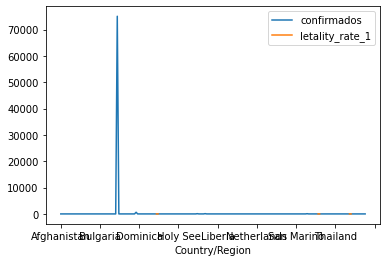

In [41]:
combinados[['confirmados', 'letality_rate_1']].plot()

In [42]:
import seaborn as sns

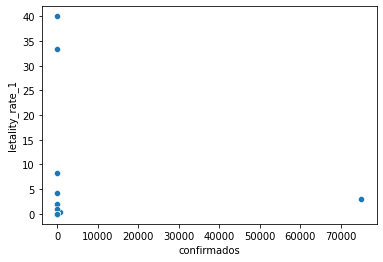

In [43]:
sns.scatterplot(data=combinados, x='confirmados', y='letality_rate_1')

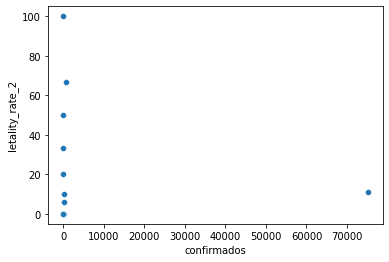

In [44]:
sns.scatterplot(data=combinados, x='confirmados', y='letality_rate_2')

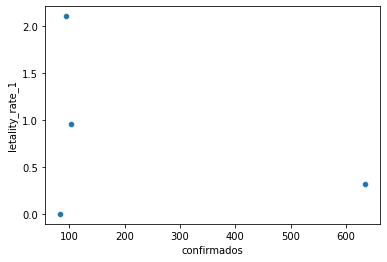

In [45]:
sns.scatterplot(data=combinados.query('confirmados > 40 and confirmados < 50000'), x='confirmados', y='letality_rate_1')

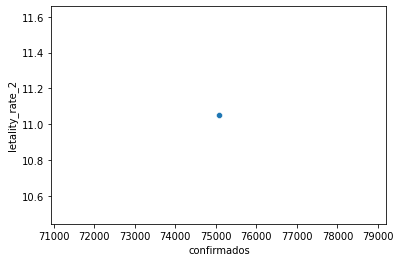

In [46]:
sns.scatterplot(data=combinados.query('recuperados > 40'), x='confirmados', y='letality_rate_2')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


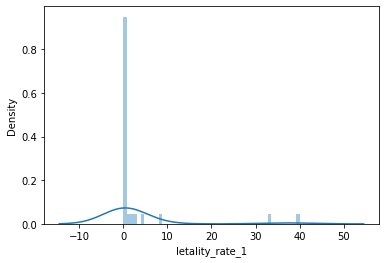

In [47]:
sns.distplot(combinados['letality_rate_1'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


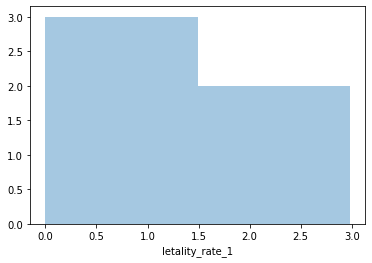

In [48]:
sns.distplot(combinados.query('confirmados > 40')['letality_rate_1'], kde=False)

In [49]:
combinados.sort_values('letality_rate_1', ascending=False).query('confirmados > 40').head(10)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
China,75077,2238,18014,2.980940,11.050760
Japan,95,2,18,2.105263,10.000000
"Korea, South",104,1,16,0.961538,5.882353
Diamond Princess,634,2,1,0.315457,66.666667
Singapore,84,0,34,0.000000,0.000000


In [50]:
combinados.sort_values('letality_rate_2', ascending=False).query('recuperados > 40').head(10)

,confirmados,mortos,recuperados,letality_rate_1,letality_rate_2
Country/Region,,,,,
China,75077,2238,18014,2.98094,11.05076


In [53]:
informacoes3 = [latest_por_pais_por_data(confirmados, '2/8/20'), latest_por_pais_por_data(mortos, '2/20/20'), latest_por_pais_por_data(recuperados, '2/20/20')]
combinados_12 = pd.concat(informacoes3, axis=1)
combinados_12.columns = ['confirmados', 'mortos', 'recuperados']

sum_up = combinados_12.loc['China']
letality_rate_3 = sum_up['mortos'] / sum_up['confirmados']

print(letality_rate_3 * 100)

6.079208996577389


# Segunda parte

In [54]:
confirmados.set_index('Country/Region').loc['China'].sum().tail()

7/12/21    104101
7/13/21    104126
7/14/21    104157
7/15/21    104193
7/16/21    104224
dtype: object

In [55]:
e_china = confirmados['Country/Region'] == 'China'
e_china.head()

0    False
1    False
2    False
3    False
4    False
Name: Country/Region, dtype: bool

In [56]:
confirmados['e_china'] = e_china
display(confirmados.head())
display(confirmados.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,e_china
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,82326,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,False
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132397,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,False
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,131647,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,False
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13781,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,False
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36004,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,False


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,e_china
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,9222,9635,9835,10048,10337,10630,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,False
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,310544,310544,311018,311018,311018,311534,311690,311948,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,False
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6823,6832,6836,6856,6857,6862,6863,6864,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,False
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,101996,103763,105909,107974,110332,111746,113134,115824,118850,122244,125157,126973,129033,130631,133659,137026,140620,143215,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,False
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39321,39432,39496,39688,39852,39959,40077,40318,40556,40927,41335,41628,41779,42195,42714,43480,44306,45217,46018,46442,47284,48533,49864,51221,52663,53665,54474,56014,57963,60227,62383,65066,66853,67765,70426,73271,76381,78872,81168,False


In [57]:
# query dos casos na China

confirmados.query('e_china == True')

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/8/21,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,e_china
58,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989,989,...,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004,1006,1006,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,1008,True
59,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400,400,...,1067,1067,1068,1069,1069,1070,1071,1071,1072,1072,1073,1073,1075,1075,1075,1075,1076,1076,1077,1079,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1078,1079,1079,1079,1079,1079,True
60,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576,576,...,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,601,601,601,601,601,601,601,601,601,601,601,601,True
61,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294,294,...,632,632,635,636,637,637,638,638,641,646,650,651,652,659,660,661,661,665,669,672,675,677,680,685,686,688,688,689,690,692,692,692,692,696,698,699,700,700,704,True
62,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91,91,...,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,195,True
63,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,207,277,354,436,535,632,725,813,895,970,1034,1095,1131,1159,1177,1219,1241,1261,1294,1316,1322,1328,1331,1332,1333,1339,1342,1345,1347,1347,...,2573,2582,2593,2605,2618,2625,2635,2650,2657,2666,2680,2692,2699,2706,2709,2717,2723,2727,2728,2733,2736,2737,2737,2745,2748,2751,2756,2759,2764,2766,2769,2770,2770,2774,2777,2779,2791,2795,2796,True
64,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,51,58,78,87,100,111,127,139,150,168,172,183,195,210,215,222,222,226,235,237,238,242,244,245,246,249,249,251,252,252,...,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,275,276,276,276,276,276,276,276,276,277,277,277,277,277,277,True
65,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,9,9,12,29,29,38,46,58,64,71,81,89,99,109,127,133,135,140,143,144,146,146,146,146,146,146,146,146,146,146,...,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,147,True
66,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,40,43,46,52,62,64,72,80,99,106,117,124,131,138,144,157,157,159,162,162,163,163,168,168,168,168,168,168,168,168,...,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,188,True
67,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,33,48,65,82,96,104,113,126,135,157,172,195,206,218,239,251,265,283,291,300,301,306,306,307,308,309,311,311,311,312,...,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,1317,

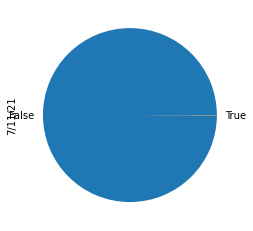

In [58]:
confirmados.groupby('e_china').sum()[last_date].plot(kind='pie')

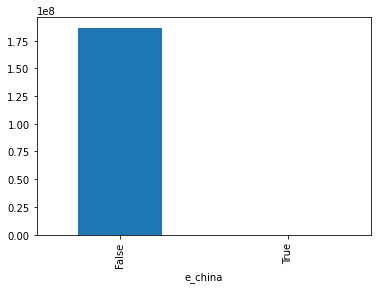

In [59]:
confirmados.groupby('e_china').sum()[last_date].plot(kind='bar')

## No dia 02/03/2020 China tinha 8 vezes o número de casos que o resto do mundo.

In [60]:
import numpy as np

In [61]:
confirmados['e_china_label'] = np.where(confirmados['e_china'], 'China', 'Outros')
display(confirmados.head())
display(confirmados.tail())

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,e_china,e_china_label
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,84050,85892,87716,88740,89861,91458,93272,93288,96531,98734,98734,98734,103902,105749,107957,109532,111592,111592,111592,115751,117158,118659,120216,120216,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653,134653,136643,137853,137853,False,Outros
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,132415,132426,132437,132449,132459,132461,132469,132476,132481,132484,132488,132490,132490,132496,132497,132499,132506,132509,132512,132513,132514,132521,132523,132526,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597,132608,132616,132629,132647,False,Outros
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,132034,132355,132727,133070,133388,133742,134115,134458,134840,135219,135586,135821,136294,136679,137049,137403,137772,138113,138465,138840,139229,139626,140075,140550,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942,147883,148797,149906,151103,False,Outros
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,13791,13805,13813,13813,13813,13826,13828,13836,13839,13842,13842,13842,13864,13864,13873,13877,13882,13882,13882,13882,13900,13911,13918,13918,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155,14167,14167,14239,14273,False,Outros
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36115,36325,36455,36600,36705,36790,36921,37094,37289,37467,37604,37678,37748,37874,38002,38091,38371,38528,38556,38613,38682,38849,38965,39089,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055,40138,40327,40530,40631,False,Outros


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,6/9/21,6/10/21,6/11/21,6/12/21,6/13/21,6/14/21,6/15/21,6/16/21,6/17/21,6/18/21,6/19/21,6/20/21,6/21/21,6/22/21,6/23/21,6/24/21,6/25/21,6/26/21,6/27/21,6/28/21,6/29/21,6/30/21,7/1/21,7/2/21,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21,7/13/21,7/14/21,7/15/21,7/16/21,e_china,e_china_label
274,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,9635,9835,10048,10337,10630,10881,11304,11794,12150,12508,12978,13258,13530,13782,13989,14323,14537,15325,15740,16136,16507,17052,17727,18121,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665,35409,38239,42288,46292,False,Outros
275,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,310544,311018,311018,311018,311534,311690,311948,312164,312334,312499,312605,312673,312811,313015,313015,313015,313520,313520,313721,313851,313851,314167,314288,314409,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224,315224,315409,315504,315504,False,Outros
276,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6832,6836,6856,6857,6862,6863,6864,6867,6869,6875,6877,6885,6889,6892,6898,6905,6905,6906,6908,6909,6918,6920,6923,6924,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952,6961,6964,6967,6972,False,Outros
277,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,103763,105909,107974,110332,111746,113134,115824,118850,122244,125157,126973,129033,130631,133659,137026,140620,143215,146031,148568,149661,152056,154948,157832,160613,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742,178748,180549,182129,183344,False,Outros
278,NaN,Zimbabwe,-19.015438,29.154857,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39432,39496,39688,39852,39959,40077,40318,40556,40927,41335,41628,41779,42195,42714,43480,44306,45217,46018,46442,47284,48533,49864,51221,52663,53665,54474,56014,57963,60227,62383,65066,66853,67765,70426,73271,76381,78872,81168,False,Outros


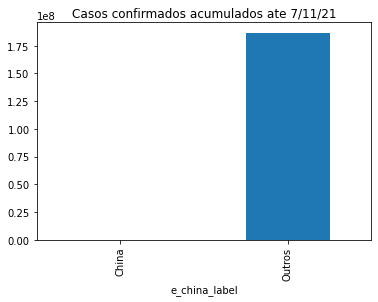

In [62]:
confirmados.groupby('e_china_label').sum()[last_date].plot(kind='bar')
plt.title(f'Casos confirmados acumulados ate {last_date}')
plt.show()

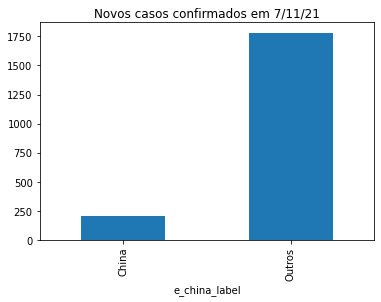

In [63]:
soma = confirmados.groupby('e_china_label').sum()
soma['delta'] = soma['3/2/20'] - soma['3/1/20']
soma['delta'].plot(kind='bar')
plt.title(f'Novos casos confirmados em {last_date}')
plt.show()

In [64]:
soma.T.head()

e_china_label,China,Outros
Lat,1085.2923,4539.266250
Long,3688.9377,2543.589914
1/22/20,548.0000,9.000000
1/23/20,643.0000,12.000000
1/24/20,920.0000,21.000000


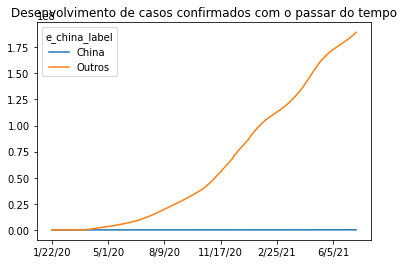

In [65]:
soma.T[2:-2].plot()
plt.title('Desenvolvimento de casos confirmados com o passar do tempo')
plt.show()

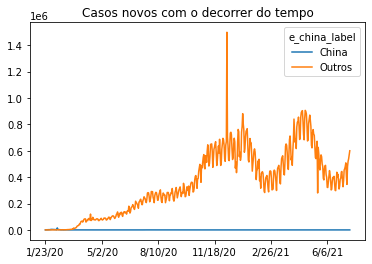

In [66]:
diferencas = soma.T[2:-2].diff().dropna()
diferencas.plot()
plt.title('Casos novos com o decorrer do tempo')
plt.show()

In [88]:
casos = confirmados.groupby('e_china_label').sum()[last_date].loc['China']
populacao_estimada = 1437525528
incidencia_de_casos = casos / populacao_estimada * 100000
incidencia_de_casos

# conta péssima, e ruim e errada.

7.239662738010173

In [95]:
un_populacao = pd.read_csv('https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv')
un_populacao['PopTotal'] = un_populacao['PopTotal'] * 1000
un_populacao.head()

,LocID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,4,Afghanistan,2,Medium,1950,1950.5,4099.243,3652.874,7752117.0,11.874
1,4,Afghanistan,2,Medium,1951,1951.5,4134.756,3705.395,7840151.0,12.009
2,4,Afghanistan,2,Medium,1952,1952.5,4174.450,3761.546,7935996.0,12.156
3,4,Afghanistan,2,Medium,1953,1953.5,4218.336,3821.348,8039684.0,12.315
4,4,Afghanistan,2,Medium,1954,1954.5,4266.484,3884.832,8151316.0,12.486


In [96]:
un_populacao.describe()

,LocID,VarID,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
count,280932.000000,280932.000000,280932.000000,280932.000000,2.508760e+05,2.508760e+05,2.809320e+05,280932.000000
mean,703.125062,22.411345,2051.026494,2051.526494,2.324362e+05,2.298754e+05,4.128536e+08,426.659040
std,631.959759,55.972847,33.642148,33.642148,6.938837e+05,6.829825e+05,1.308911e+09,2418.990784
min,4.000000,2.000000,1950.000000,1950.500000,6.812000e+00,6.889000e+00,1.510000e+02,0.052000
25%,300.000000,2.000000,2031.000000,2031.500000,1.847834e+03,1.860604e+03,1.240100e+06,34.205250
50%,586.000000,5.000000,2055.000000,2055.500000,1.136849e+04,1.164585e+04,1.420555e+07,91.590000
75%,903.000000,9.000000,2078.000000,2078.500000,8.526402e+04,8.648854e+04,1.171661e+08,216.985750
max,5501.000000,207.000000,2100.000000,2100.500000,1.092000e+07,1.071273e+07,2.163274e+10,56025.839000


In [99]:
un_populacao_total = un_populacao.query('Time==2019')[['Location', 'PopTotal']].set_index('Location')
un_populacao_total.head()

,PopTotal
Location,
Afghanistan,3.804176e+07
Africa,1.308064e+09
African Group,1.306321e+09
African Union,1.306903e+09
African Union: Central Africa,1.540137e+08


TypeError: ignored